In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../BERT/testdata/data_combined_24.csv', sep=',', header=None)
df.columns = ['label', 'text']
#filter out labels 'nature' 'technology' and 'news'
df = df[df.label != 'nature']
df = df[df.label != 'technology']
df = df[df.label != 'news']
df.head()

,label,text
0,culture,indigenous woman chile teaches aymara ancestry...
1,culture,arabia difference etiquette wearing slippers l...
2,culture,slow look around patient means embracing thing...
3,culture,culturescountries outside usa western europe v...
4,culture,fake government birds heard right couldnt beli...


In [3]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X)

Y = pd.get_dummies(df['label']).values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(1000, 64, input_length=X.shape[1]))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1953, 64)          64000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 20)                1300      
                                                                 
Total params: 139,604
Trainable params: 139,604
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
392/392 [==============================] - 2177s 6s/step - loss: 2.7320 - accuracy: 0.1315 - val_loss: 2.5085 - val_accuracy: 0.2104
Epoch 2/10
392/392 [==============================] - 2182s 6s/step - loss: 2.2057 - accuracy: 0.3264 - val_loss: 2.0788 - val_accuracy: 0.3730
Epoch 3/10
392/392 [==============================] - 2201s 6s/step - loss: 1.9305 - accuracy: 0.4278 - val_loss: 1.9249 - val_accuracy: 0.4352
Epoch 4/10
392/392 [==============================] - 2283s 6s/step - loss: 1.7859 - accuracy: 0.4739 - val_loss: 1.8623 - val_accuracy: 0.4520
Epoch 5/10
392/392 [==============================] - 2234s 6s/step - loss: 1.7112 - accuracy: 0.4948 - val_loss: 1.8298 - val_accuracy: 0.4676
Epoch 6/10
392/392 [==============================] - 2164s 6s/step - loss: 1.6376 - accuracy: 0.5152 - val_loss: 1.7916 - val_accuracy: 0.4775
Epoch 7/10
392/392 [==============================] - 2182s 6s/step - loss: 1.5801 - accuracy: 0.5310 - val_loss: 1.7790 - val_accuracy:

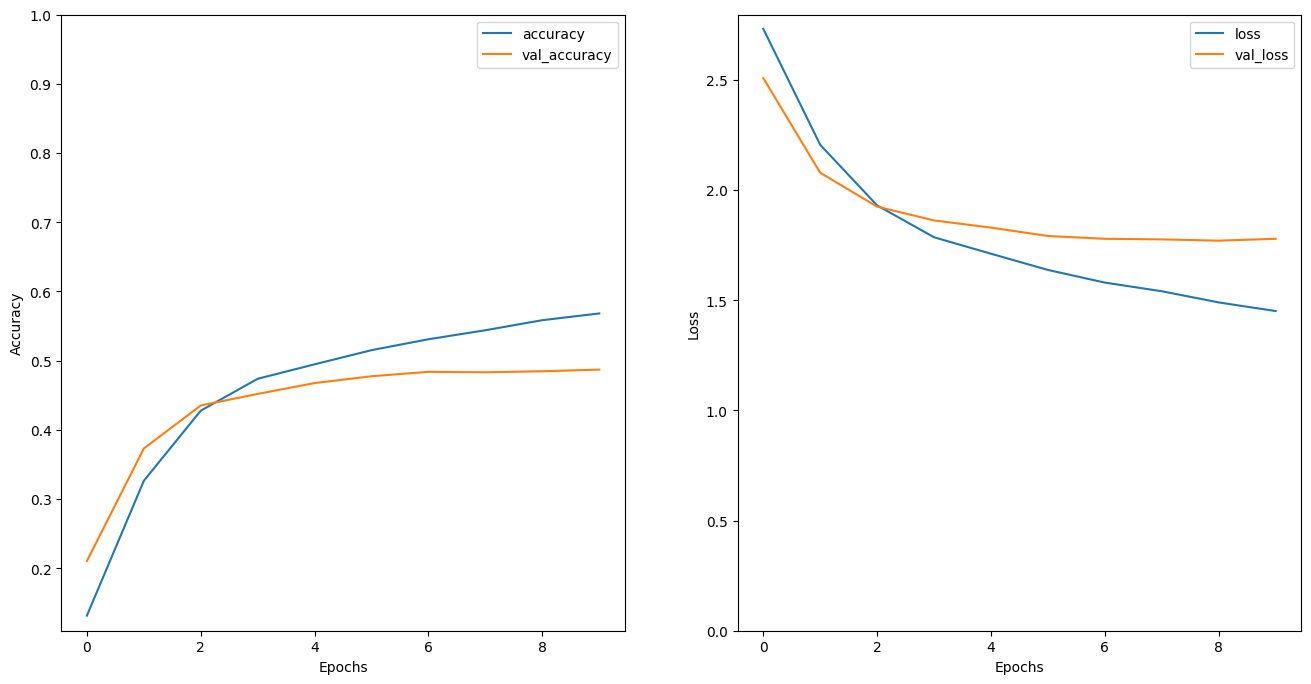

In [9]:
# plot accuracy and loss over epochs
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim(None,1)
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['loss', 'val_loss'])
plt.ylim(0,None)
plt.show()